### Análisis Exploratorio de Datos

https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset/version/1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
spotify_songs = pd.read_csv('Spotify-2000.csv')
spotify_songs.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [3]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
Index                     1994 non-null int64
Title                     1994 non-null object
Artist                    1994 non-null object
Top Genre                 1994 non-null object
Year                      1994 non-null int64
Beats Per Minute (BPM)    1994 non-null int64
Energy                    1994 non-null int64
Danceability              1994 non-null int64
Loudness (dB)             1994 non-null int64
Liveness                  1994 non-null int64
Valence                   1994 non-null int64
Length (Duration)         1994 non-null object
Acousticness              1994 non-null int64
Speechiness               1994 non-null int64
Popularity                1994 non-null int64
dtypes: int64(11), object(4)
memory usage: 233.8+ KB


In [4]:
print(spotify_songs.shape)

(1994, 15)


In [5]:
spotify_songs.size

29910

In [6]:
spotify_songs.count()

Index                     1994
Title                     1994
Artist                    1994
Top Genre                 1994
Year                      1994
Beats Per Minute (BPM)    1994
Energy                    1994
Danceability              1994
Loudness (dB)             1994
Liveness                  1994
Valence                   1994
Length (Duration)         1994
Acousticness              1994
Speechiness               1994
Popularity                1994
dtype: int64

* Analizando propiedades del set

In [7]:
genres = spotify_songs['Top Genre']

In [8]:
type(genres)

pandas.core.series.Series

In [9]:
genres.value_counts()

album rock                 413
adult standards            123
dutch pop                   88
alternative rock            86
dance pop                   83
dutch indie                 75
alternative metal           70
dance rock                  52
classic rock                51
dutch cabaret               51
glam rock                   49
modern rock                 49
pop                         47
art rock                    40
permanent wave              38
british invasion            36
irish rock                  34
british soul                31
europop                     27
classic uk pop              22
dutch rock                  18
disco                       18
neo mellow                  17
glam metal                  17
alternative dance           15
blues rock                  15
art pop                     14
funk                        13
dutch hip hop               13
dutch americana             12
                          ... 
alaska indie                 1
canadian

In [11]:
artists = spotify_songs['Artist']
artists.value_counts()

Queen                           37
The Beatles                     36
Coldplay                        27
U2                              26
The Rolling Stones              24
Michael Jackson                 23
Bruce Springsteen               23
ABBA                            22
David Bowie                     21
Fleetwood Mac                   18
Elvis Presley                   17
BLØF                            17
George Michael                  16
Muse                            15
Marco Borsato                   15
Adele                           14
Dire Straits                    14
Anouk                           13
De Dijk                         13
Creedence Clearwater Revival    13
Pink Floyd                      13
Prince                          12
Ed Sheeran                      12
Bee Gees                        12
Eagles                          12
Golden Earring                  12
Metallica                       11
Andre Hazes                     11
Nirvana             

* Análisis sobre géneros musicales

In [12]:
genres_counts = genres.value_counts()
genres_with_one_song = genres_counts[genres_counts == 1]
genres_with_one_song.count()

54

In [13]:
#Cuantos géneros musicales hay en el set
len(genres.unique())

149

* Análisis sobre artistas

In [14]:
artists_counts = artists.value_counts()
artists_with_one_song = artists_counts[artists_counts == 1]
artists_with_one_song.count()

410

In [15]:
#Cuantos artistas tiene una sola canción en el set
len(artists.unique())

731

* Análisis sobre años

In [16]:
spotify_songs['Year'].value_counts()

2008    54
2018    52
1991    52
1977    51
2002    47
1987    46
2011    46
2017    45
1998    45
2004    45
2005    44
1984    44
1971    43
2014    43
2009    43
1986    42
2015    42
2012    41
2013    41
2006    40
1979    40
1970    40
1995    39
1969    38
1980    37
1967    37
1975    36
2007    36
1997    35
1992    35
        ..
2000    33
2010    33
1982    32
1978    31
1976    31
1988    30
1983    30
2001    30
1999    29
1973    29
1972    29
1993    28
2003    28
1968    27
1994    25
1996    24
1974    23
2019    21
1966    20
1990    19
1981    15
1965    15
1964     9
1963     7
1958     5
1962     3
1959     3
1961     1
1960     1
1956     1
Name: Year, Length: 63, dtype: int64

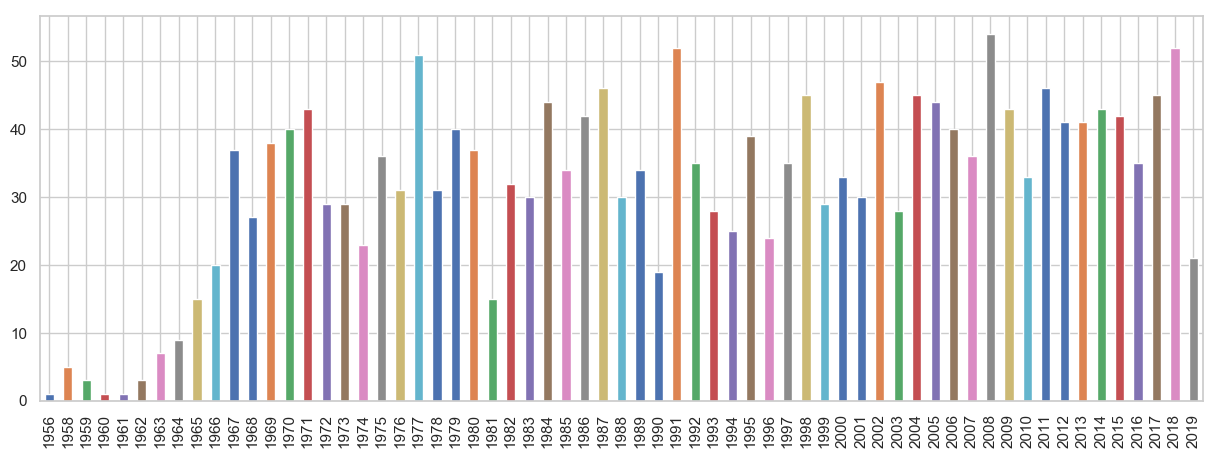

In [17]:
spotify_songs['Year'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))

* Análisis sobre BPM (beats per minute)

In [18]:
spotify_songs['Beats Per Minute (BPM)']

0       157
1       135
2       168
3       173
4       106
5        99
6       102
7       137
8       148
9       112
10      109
11      124
12      102
13      117
14      112
15      133
16      123
17      127
18       87
19       74
20      138
21      142
22       96
23      138
24      112
25      130
26      123
27      148
28      142
29      154
       ... 
1964    182
1965    124
1966     80
1967    121
1968    129
1969    103
1970    117
1971    101
1972     91
1973     87
1974    118
1975    156
1976    108
1977    197
1978    121
1979    109
1980     89
1981     75
1982    127
1983    129
1984    154
1985     95
1986    167
1987    119
1988    168
1989     94
1990    175
1991    168
1992    174
1993    133
Name: Beats Per Minute (BPM), Length: 1994, dtype: int64

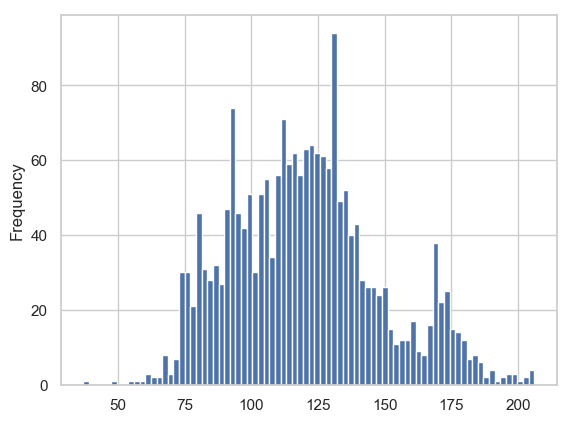

In [20]:
spotify_songs['Beats Per Minute (BPM)'].plot(kind='hist', bins=80)

* Análisis sobre el uso de memoria

In [21]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
Index                     1994 non-null int64
Title                     1994 non-null object
Artist                    1994 non-null object
Top Genre                 1994 non-null object
Year                      1994 non-null int64
Beats Per Minute (BPM)    1994 non-null int64
Energy                    1994 non-null int64
Danceability              1994 non-null int64
Loudness (dB)             1994 non-null int64
Liveness                  1994 non-null int64
Valence                   1994 non-null int64
Length (Duration)         1994 non-null object
Acousticness              1994 non-null int64
Speechiness               1994 non-null int64
Popularity                1994 non-null int64
dtypes: int64(11), object(4)
memory usage: 233.8+ KB


In [22]:
(spotify_songs.memory_usage() / (1024)).sum()

233.75

* Análisis sobre calidad de datos

In [24]:
spotify_songs.isnull().any()

Index                     False
Title                     False
Artist                    False
Top Genre                 False
Year                      False
Beats Per Minute (BPM)    False
Energy                    False
Danceability              False
Loudness (dB)             False
Liveness                  False
Valence                   False
Length (Duration)         False
Acousticness              False
Speechiness               False
Popularity                False
dtype: bool

In [25]:
spotify_songs.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

* Estadísticas sobre el dataframe

In [26]:
spotify_songs.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,"1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00"
mean,997.50,"1,992.99",120.22,59.68,53.24,-9.01,19.01,49.41,28.86,4.99,59.53
std,575.76,16.12,28.03,22.15,15.35,3.65,16.73,24.86,29.01,4.40,14.35
min,1.00,"1,956.00",37.00,3.00,10.00,-27.00,2.00,3.00,0.00,2.00,11.00
25%,499.25,"1,979.00",99.00,42.00,43.00,-11.00,9.00,29.00,3.00,3.00,49.25
50%,997.50,"1,993.00",119.00,61.00,53.00,-8.00,12.00,47.00,18.00,4.00,62.00
75%,"1,495.75","2,007.00",136.00,78.00,64.00,-6.00,23.00,69.75,50.00,5.00,71.00
max,"1,994.00","2,019.00",206.00,100.00,96.00,-2.00,99.00,99.00,99.00,55.00,100.00


In [27]:
#La duración de las canciones no aparece como variable numérica
#Con include='all' podemos ver las estadísticas sobre todas las columnas
spotify_songs.describe(include='all')

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,"1,994.00",1994,1994,1994,"1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00",1994,"1,994.00","1,994.00","1,994.00"
unique,nan,1958,731,149,nan,nan,nan,nan,nan,nan,nan,350,nan,nan,nan
top,nan,Hallelujah,Queen,album rock,nan,nan,nan,nan,nan,nan,nan,215,nan,nan,nan
freq,nan,3,37,413,nan,nan,nan,nan,nan,nan,nan,23,nan,nan,nan
mean,997.50,NaN,NaN,NaN,"1,992.99",120.22,59.68,53.24,-9.01,19.01,49.41,NaN,28.86,4.99,59.53
std,575.76,NaN,NaN,NaN,16.12,28.03,22.15,15.35,3.65,16.73,24.86,NaN,29.01,4.40,14.35
min,1.00,NaN,NaN,NaN,"1,956.00",37.00,3.00,10.00,-27.00,2.00,3.00,NaN,0.00,2.00,11.00
25%,499.25,NaN,NaN,NaN,"1,979.00",99.00,42.00,43.00,-11.00,9.00,29.00,NaN,3.00,3.00,49.25
50%,997.50,NaN,NaN,NaN,"1,993.00",119.00,61.00,53.00,-8.00,12.00,47.00,NaN,18.00,4.00,62.00
75%,"1,495.75",NaN,NaN,NaN,"2,007.00",136.00,78.00,64.00,-6.00,23.00,69.75,NaN,50.00,5.00,71.00


In [29]:
#Buscamos el tipo de Length
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
Index                     1994 non-null int64
Title                     1994 non-null object
Artist                    1994 non-null object
Top Genre                 1994 non-null object
Year                      1994 non-null int64
Beats Per Minute (BPM)    1994 non-null int64
Energy                    1994 non-null int64
Danceability              1994 non-null int64
Loudness (dB)             1994 non-null int64
Liveness                  1994 non-null int64
Valence                   1994 non-null int64
Length (Duration)         1994 non-null object
Acousticness              1994 non-null int64
Speechiness               1994 non-null int64
Popularity                1994 non-null int64
dtypes: int64(11), object(4)
memory usage: 233.8+ KB


In [31]:
#spotify_songs['Length (Duration)'].astype('int64')
#Devuelve error

In [32]:
spotify_songs['Length (Duration)'] = spotify_songs['Length (Duration)'].str.replace(',', '').astype('int64')

In [33]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
Index                     1994 non-null int64
Title                     1994 non-null object
Artist                    1994 non-null object
Top Genre                 1994 non-null object
Year                      1994 non-null int64
Beats Per Minute (BPM)    1994 non-null int64
Energy                    1994 non-null int64
Danceability              1994 non-null int64
Loudness (dB)             1994 non-null int64
Liveness                  1994 non-null int64
Valence                   1994 non-null int64
Length (Duration)         1994 non-null int64
Acousticness              1994 non-null int64
Speechiness               1994 non-null int64
Popularity                1994 non-null int64
dtypes: int64(12), object(3)
memory usage: 233.8+ KB


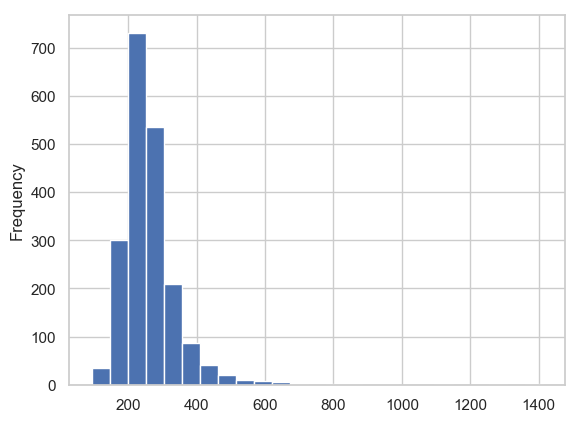

In [34]:
spotify_songs['Length (Duration)'].plot(kind='hist', bins=25)

In [35]:
spotify_songs.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,"1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00"
mean,997.50,"1,992.99",120.22,59.68,53.24,-9.01,19.01,49.41,262.44,28.86,4.99,59.53
std,575.76,16.12,28.03,22.15,15.35,3.65,16.73,24.86,93.60,29.01,4.40,14.35
min,1.00,"1,956.00",37.00,3.00,10.00,-27.00,2.00,3.00,93.00,0.00,2.00,11.00
25%,499.25,"1,979.00",99.00,42.00,43.00,-11.00,9.00,29.00,212.00,3.00,3.00,49.25
50%,997.50,"1,993.00",119.00,61.00,53.00,-8.00,12.00,47.00,245.00,18.00,4.00,62.00
75%,"1,495.75","2,007.00",136.00,78.00,64.00,-6.00,23.00,69.75,289.00,50.00,5.00,71.00
max,"1,994.00","2,019.00",206.00,100.00,96.00,-2.00,99.00,99.00,"1,412.00",99.00,55.00,100.00


#### Análisis de distribución de variables y Visualización ####

In [36]:
spotify_songs.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,"1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00","1,994.00"
mean,997.50,"1,992.99",120.22,59.68,53.24,-9.01,19.01,49.41,262.44,28.86,4.99,59.53
std,575.76,16.12,28.03,22.15,15.35,3.65,16.73,24.86,93.60,29.01,4.40,14.35
min,1.00,"1,956.00",37.00,3.00,10.00,-27.00,2.00,3.00,93.00,0.00,2.00,11.00
25%,499.25,"1,979.00",99.00,42.00,43.00,-11.00,9.00,29.00,212.00,3.00,3.00,49.25
50%,997.50,"1,993.00",119.00,61.00,53.00,-8.00,12.00,47.00,245.00,18.00,4.00,62.00
75%,"1,495.75","2,007.00",136.00,78.00,64.00,-6.00,23.00,69.75,289.00,50.00,5.00,71.00
max,"1,994.00","2,019.00",206.00,100.00,96.00,-2.00,99.00,99.00,"1,412.00",99.00,55.00,100.00


__Histograma__

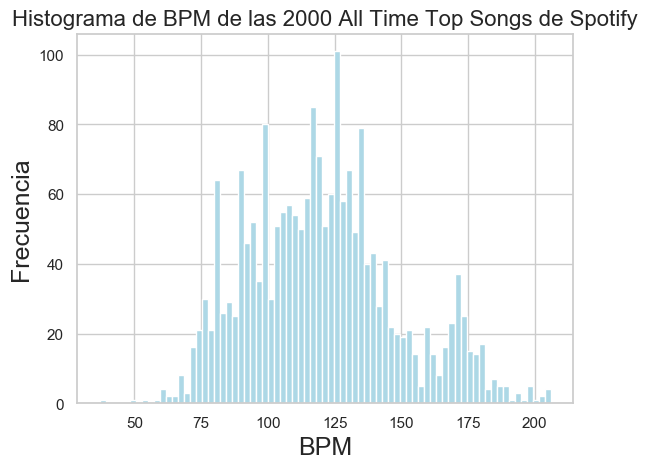

In [38]:
g = spotify_songs['Beats Per Minute (BPM)'].plot.hist(bins=75, color='lightblue')
g.set_title('Histograma de BPM de las 2000 All Time Top Songs de Spotify', fontsize=16)
g.set_xlabel('BPM', fontsize=18)
g.set_ylabel('Frecuencia', fontsize=18)

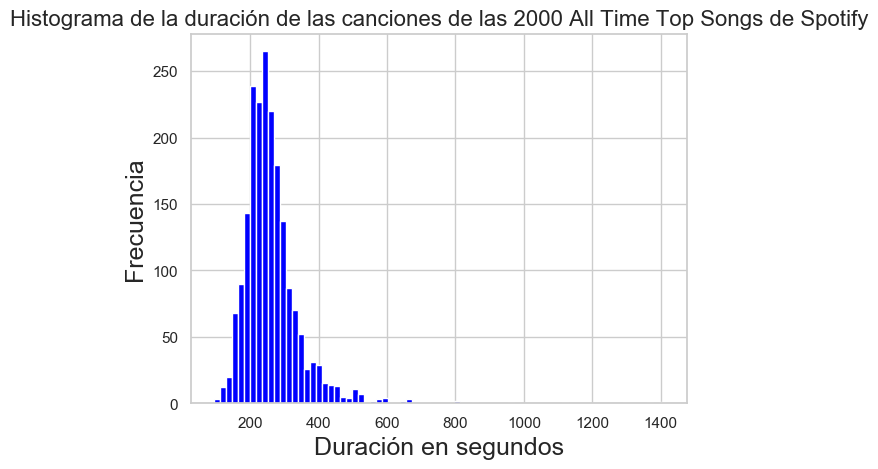

In [39]:
g = spotify_songs['Length (Duration)'].plot.hist(bins=75, color='blue')
g.set_title('Histograma de la duración de las canciones de las 2000 All Time Top Songs de Spotify', fontsize=16)
g.set_xlabel('Duración en segundos', fontsize=18)
g.set_ylabel('Frecuencia', fontsize=18)

__Density Plot__

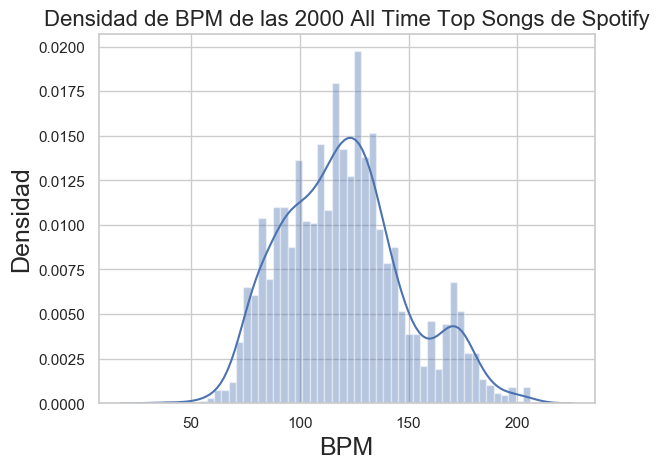

In [44]:
g = sns.distplot(spotify_songs['Beats Per Minute (BPM)'], bins=50, hist=True)
g.set_title('Densidad de BPM de las 2000 All Time Top Songs de Spotify', fontsize=16)
g.set_xlabel('BPM', fontsize=18)
g.set_ylabel('Densidad', fontsize=18)

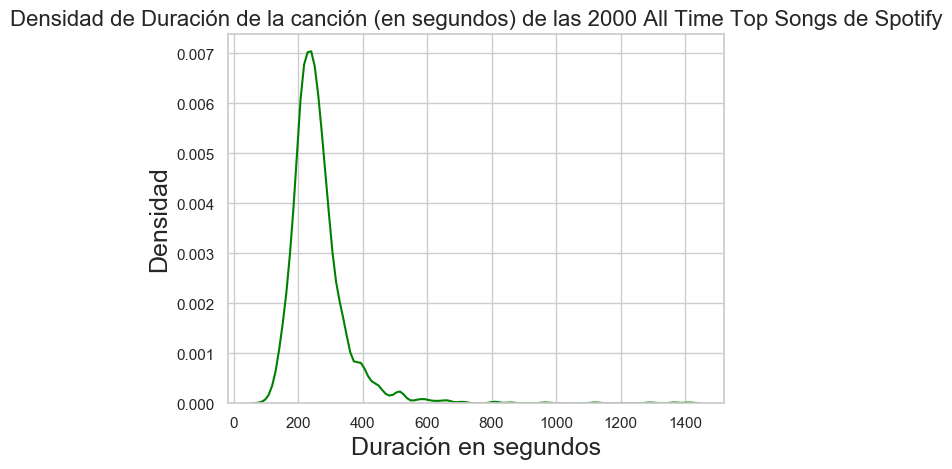

In [45]:
g = sns.distplot(spotify_songs['Length (Duration)'], color='green', hist=False)
g.set_title('Densidad de Duración de la canción (en segundos) de las 2000 All Time Top Songs de Spotify', fontsize=16)
g.set_xlabel('Duración en segundos', fontsize=18)
g.set_ylabel('Densidad', fontsize=18)

__Overlaid Histogras & Density Plots__

In [46]:
genre_counts = spotify_songs['Top Genre'].value_counts()
genre_counts[genres_counts > genres_counts.mean()]

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
classic rock          51
dutch cabaret         51
glam rock             49
modern rock           49
pop                   47
art rock              40
permanent wave        38
british invasion      36
irish rock            34
british soul          31
europop               27
classic uk pop        22
dutch rock            18
disco                 18
neo mellow            17
glam metal            17
alternative dance     15
blues rock            15
art pop               14
Name: Top Genre, dtype: int64

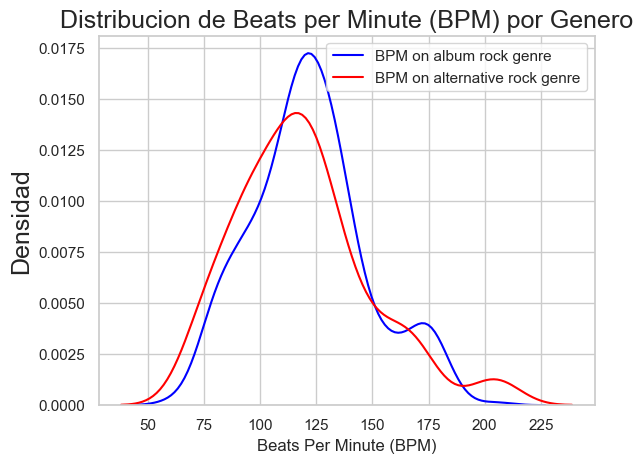

In [47]:
g = sns.distplot(spotify_songs[spotify_songs['Top Genre'] == "album rock"]['Beats Per Minute (BPM)'], color="blue", label='BPM on album rock genre', hist=False)
g = sns.distplot(spotify_songs[spotify_songs['Top Genre'] == "alternative rock"]['Beats Per Minute (BPM)'], color="red", label='BPM on alternative rock genre', hist=False)
g.set_title("Distribucion de Beats per Minute (BPM) por Genero", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

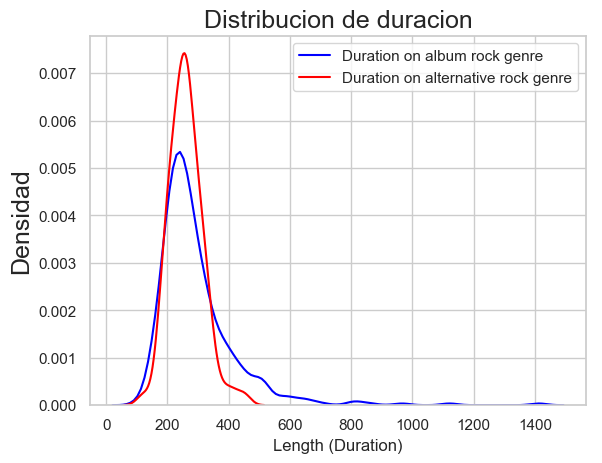

In [48]:
g = sns.distplot(spotify_songs[spotify_songs['Top Genre'] == "album rock"]["Length (Duration)"], color="blue", label='Duration on album rock genre', hist=False)
g = sns.distplot(spotify_songs[spotify_songs['Top Genre'] == "alternative rock"]["Length (Duration)"], color="red", label='Duration on alternative rock genre', hist=False)

g.set_title("Distribucion de duracion", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

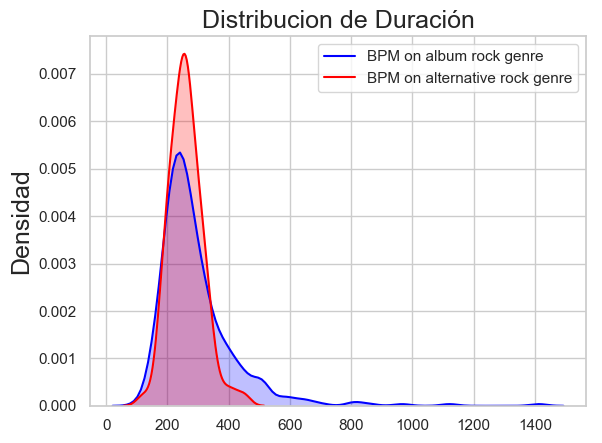

In [50]:
#KDE tiene el parámetro shade
g = sns.kdeplot(spotify_songs[spotify_songs['Top Genre'] == "album rock"]["Length (Duration)"], color="blue", label='BPM on album rock genre', shade=True)
g = sns.kdeplot(spotify_songs[spotify_songs['Top Genre'] == "alternative rock"]["Length (Duration)"], color="red", label='BPM on alternative rock genre', shade=True)

g.set_title("Distribucion de Duración", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

__Scatter Plot__

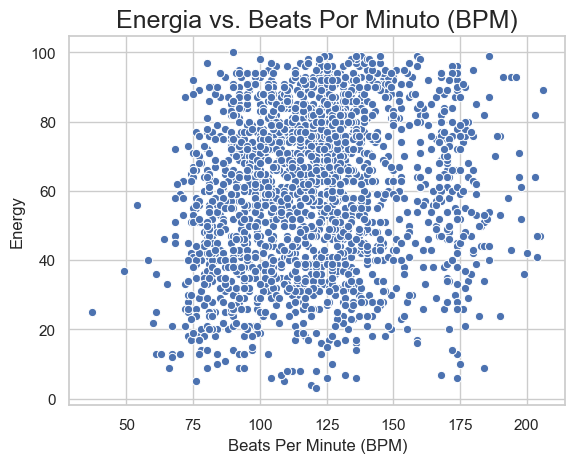

In [51]:
g = sns.scatterplot(x="Beats Per Minute (BPM)", y="Energy", data=spotify_songs)
g.set_title("Energia vs. Beats Por Minuto (BPM)", fontsize=18)

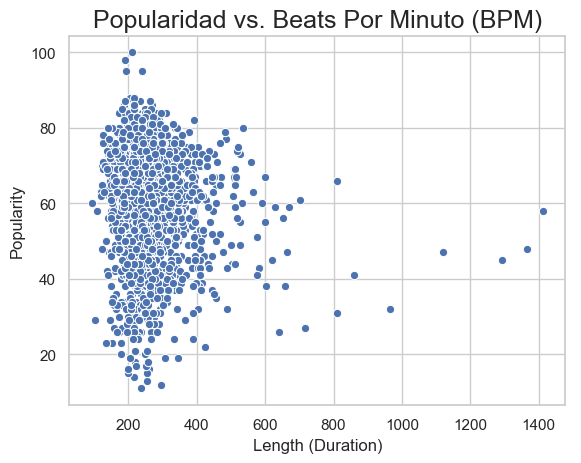

In [52]:
g = sns.scatterplot(x="Length (Duration)", y="Popularity", data=spotify_songs)
g.set_title("Popularidad vs. Beats Por Minuto (BPM)", fontsize=18)

In [54]:
beatles_stones_songs = spotify_songs[(spotify_songs['Artist'] == 'The Beatles') | (spotify_songs['Artist'] == 'The Rolling Stones')]
beatles_stones_songs

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
148,149,I Want To Hold Your Hand - Remastered 2015,The Beatles,british invasion,2000,131,72,49,-6,31,87,146,39,5,75
284,285,Lady Jane - (Original Single Mono Version),The Rolling Stones,album rock,2004,205,47,38,-12,9,31,190,34,5,34
307,308,Lady Madonna - Remastered 2015,The Beatles,british invasion,2000,110,78,65,-5,22,57,137,14,3,63
313,314,We Can Work It Out - Remastered 2015,The Beatles,british invasion,2000,106,68,38,-9,18,65,136,6,3,63
318,319,Hey Jude,The Beatles,british invasion,2006,74,63,46,-7,40,59,239,9,2,63
588,589,Yellow Submarine,The Beatles,british invasion,2014,111,64,62,-7,52,65,159,21,3,58
800,801,Let It Be - Remastered 2009,The Beatles,british invasion,1970,143,40,44,-8,11,41,243,63,3,79
813,814,The Long And Winding Road - Remastered 2009,The Beatles,british invasion,1970,132,33,30,-10,6,39,218,76,3,64
820,821,Get Back - Remastered 2009,The Beatles,british invasion,1970,123,59,76,-10,61,33,189,49,6,65
849,850,Wild Horses,The Rolling Stones,album rock,1971,140,39,43,-7,8,16,342,69,3,72


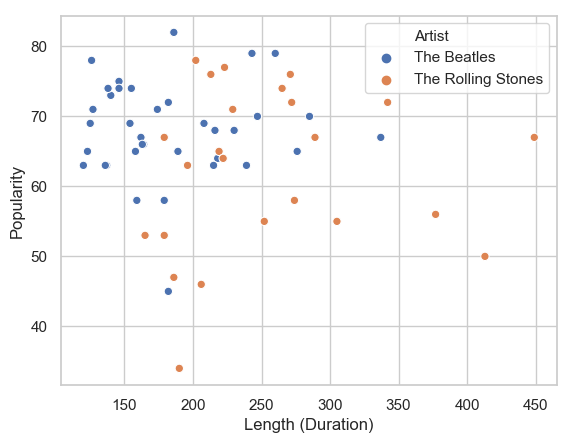

In [55]:
sns.scatterplot(x="Length (Duration)", y="Popularity", data=beatles_stones_songs, hue="Artist")

__Pairplot__

Solo sobre columnas numéricas

In [57]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
Index                     1994 non-null int64
Title                     1994 non-null object
Artist                    1994 non-null object
Top Genre                 1994 non-null object
Year                      1994 non-null int64
Beats Per Minute (BPM)    1994 non-null int64
Energy                    1994 non-null int64
Danceability              1994 non-null int64
Loudness (dB)             1994 non-null int64
Liveness                  1994 non-null int64
Valence                   1994 non-null int64
Length (Duration)         1994 non-null int64
Acousticness              1994 non-null int64
Speechiness               1994 non-null int64
Popularity                1994 non-null int64
dtypes: int64(12), object(3)
memory usage: 233.8+ KB


In [58]:
for_pairwise_analisis = spotify_songs[['Beats Per Minute (BPM)', 'Length (Duration)', 'Popularity']]

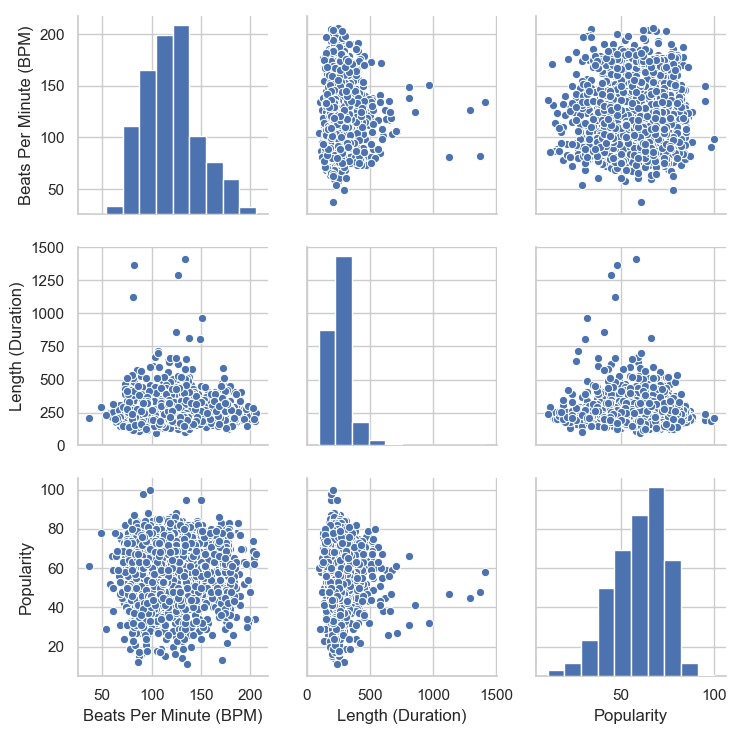

In [59]:
sns.pairplot(for_pairwise_analisis)

https://seaborn.pydata.org/tutorial/distributions.html

#### Análisis por Artista con mayor representación ####

In [60]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
Index                     1994 non-null int64
Title                     1994 non-null object
Artist                    1994 non-null object
Top Genre                 1994 non-null object
Year                      1994 non-null int64
Beats Per Minute (BPM)    1994 non-null int64
Energy                    1994 non-null int64
Danceability              1994 non-null int64
Loudness (dB)             1994 non-null int64
Liveness                  1994 non-null int64
Valence                   1994 non-null int64
Length (Duration)         1994 non-null int64
Acousticness              1994 non-null int64
Speechiness               1994 non-null int64
Popularity                1994 non-null int64
dtypes: int64(12), object(3)
memory usage: 233.8+ KB


In [63]:
spotify_songs['Artist'].value_counts()

Queen                           37
The Beatles                     36
Coldplay                        27
U2                              26
The Rolling Stones              24
Michael Jackson                 23
Bruce Springsteen               23
ABBA                            22
David Bowie                     21
Fleetwood Mac                   18
Elvis Presley                   17
BLØF                            17
George Michael                  16
Muse                            15
Marco Borsato                   15
Adele                           14
Dire Straits                    14
Anouk                           13
De Dijk                         13
Creedence Clearwater Revival    13
Pink Floyd                      13
Prince                          12
Ed Sheeran                      12
Bee Gees                        12
Eagles                          12
Golden Earring                  12
Metallica                       11
Andre Hazes                     11
Nirvana             

In [64]:
songs_by_main_artists = spotify_songs.groupby('Artist').filter(lambda x: len(x) >=24)

In [65]:
songs_by_main_artists

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
16,17,Speed of Sound,Coldplay,permanent wave,2005,123,90,52,-7,7,36,288,0,6,69
20,21,Fix You,Coldplay,permanent wave,2005,138,42,21,-9,11,12,296,16,3,81
30,31,The Scientist,Coldplay,permanent wave,2002,146,44,56,-7,11,21,310,73,2,84
37,38,The Saints Are Coming,U2,irish rock,2006,152,81,32,-7,15,12,202,8,5,40
56,57,Sometimes You Can't Make It On Your Own,U2,irish rock,2004,96,60,53,-6,11,35,305,0,2,57
136,137,Talk,Coldplay,permanent wave,2005,120,56,41,-11,16,16,311,1,3,63
148,149,I Want To Hold Your Hand - Remastered 2015,The Beatles,british invasion,2000,131,72,49,-6,31,87,146,39,5,75
155,156,God Put a Smile upon Your Face,Coldplay,permanent wave,2002,127,56,61,-6,4,24,297,18,3,64
183,184,Magnificent,U2,irish rock,2009,115,72,53,-6,11,59,324,0,3,44
193,194,Stuck In A Moment You Can't Get Out Of,U2,irish rock,2000,159,64,52,-5,17,32,272,39,2,52


In [67]:
print("Calculando la media de los artistas mas frecuentes en el set de datos:")
print(round(songs_by_main_artists.groupby(["Artist"])["Beats Per Minute (BPM)", "Length (Duration)"].mean(),2))

Calculando la media de los artistas mas frecuentes en el set de datos:
                    Beats Per Minute (BPM)    Length (Duration)
Artist                                                         
Coldplay                            127.00               274.78
Queen                               103.30               250.70
The Beatles                         119.22               184.58
The Rolling Stones                  118.21               254.92
U2                                  127.00               273.81


In [68]:
print("Calculando el desvio de los artistas mas frecuentes en el set de datos")
print(round(songs_by_main_artists.groupby(["Artist"])["Beats Per Minute (BPM)", "Length (Duration)"].std(),2))

Calculando el desvio de los artistas mas frecuentes en el set de datos
                    Beats Per Minute (BPM)    Length (Duration)
Artist                                                         
Coldplay                             25.76                40.34
Queen                                26.22                58.47
The Beatles                          27.25                52.93
The Rolling Stones                   27.77                76.02
U2                                   25.74                49.43


__Boxplot__

https://seaborn.pydata.org/generated/seaborn.boxplot.html

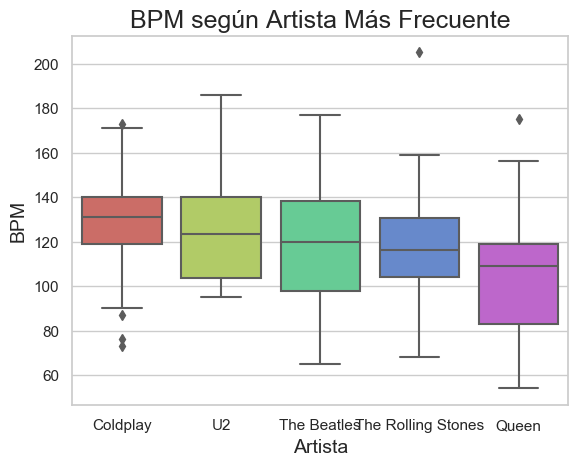

In [71]:
g = sns.boxplot(x="Artist", y="Beats Per Minute (BPM)", 
                     data=songs_by_main_artists, palette="hls")
g.set_title("BPM según Artista Más Frecuente", fontsize=18)
g.set_xlabel("Artista", fontsize=14)
g.set_ylabel("BPM", fontsize=14)

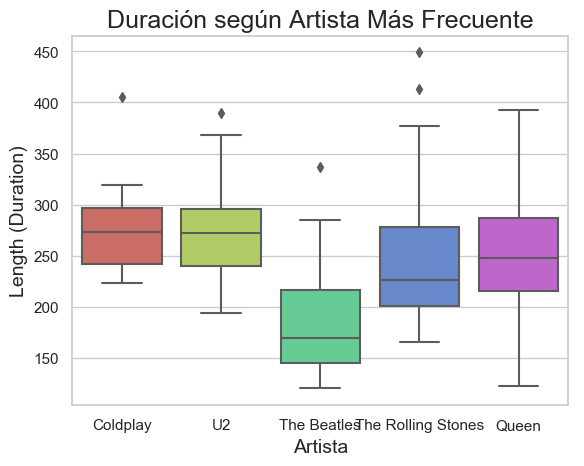

In [72]:
g = sns.boxplot(x="Artist", y="Length (Duration)", 
                     data=songs_by_main_artists, palette="hls")
g.set_title("Duración según Artista Más Frecuente", fontsize=18)
g.set_xlabel("Artista", fontsize=14)
g.set_ylabel("Length (Duration)", fontsize=14)

* Géneros con mayor cantidad de canciones

In [76]:
main_genres_counts = spotify_songs["Top Genre"].value_counts()
main_genres_counts

album rock                 413
adult standards            123
dutch pop                   88
alternative rock            86
dance pop                   83
dutch indie                 75
alternative metal           70
dance rock                  52
classic rock                51
dutch cabaret               51
glam rock                   49
modern rock                 49
pop                         47
art rock                    40
permanent wave              38
british invasion            36
irish rock                  34
british soul                31
europop                     27
classic uk pop              22
dutch rock                  18
disco                       18
neo mellow                  17
glam metal                  17
alternative dance           15
blues rock                  15
art pop                     14
funk                        13
dutch hip hop               13
dutch americana             12
                          ... 
alaska indie                 1
canadian

In [77]:
main_genres_counts = main_genres_counts[main_genres_counts > main_genres_counts.mean()]
main_genres_counts

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
classic rock          51
dutch cabaret         51
glam rock             49
modern rock           49
pop                   47
art rock              40
permanent wave        38
british invasion      36
irish rock            34
british soul          31
europop               27
classic uk pop        22
dutch rock            18
disco                 18
neo mellow            17
glam metal            17
alternative dance     15
blues rock            15
art pop               14
Name: Top Genre, dtype: int64

__Bar Plot__

https://seaborn.pydata.org/generated/seaborn.barplot.html

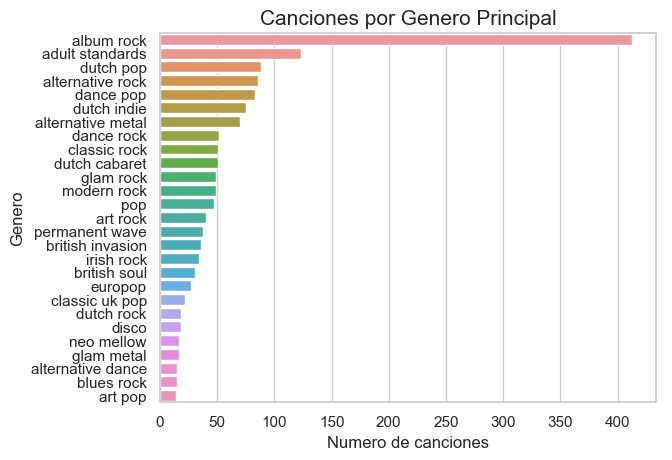

In [78]:
g = sns.barplot(x=main_genres_counts.values, y=main_genres_counts.index, orient='h')
g.set_title("Canciones por Genero Principal", fontsize=15)
g.set_xlabel("Numero de canciones", fontsize=12)
g.set_ylabel("Genero", fontsize=12)